# Sun Angles

<i>© Von P. Walden, Washington State University</i>

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Calculates the diurnal cycle for a given longitude, latitude and day of year.

In [2]:
import ephem
from datetime import datetime, timedelta

In [3]:
site = ephem.Observer()

# INPUT THE LONGITUDE AND LATITUDE MANUALLY
#site.lon, site.lat = '-117.', '+46.'      # Moscow-Pullman
#site.lon, site.lat = '0.', '72.5'      # Summit Station, Greenland
site.lon, site.lat = '0.', '-80.'       # Antarctica

In [4]:
# USE THE CURRENT DAY
#utc = datetime.utcnow()

# INPUT THE DAY MANUALLY
utc = datetime(2014,2,28)

site.date = utc.strftime('%Y/%m/%d')
utcday    = datetime(utc.year, utc.month, utc.day)

In [5]:
sun = ephem.Sun()
sun.compute(site)
time = array([])
alt  = array([])
azi  = array([])
for hour in range(48):                                    # At 30-minute resolution        
    time = append(time,utcday + timedelta(hour/48.))
    alt  = append(alt,sun.alt)
    azi  = append(azi,sun.az)
    
    site.date += ephem.minute * 30.
    sun.compute(site)


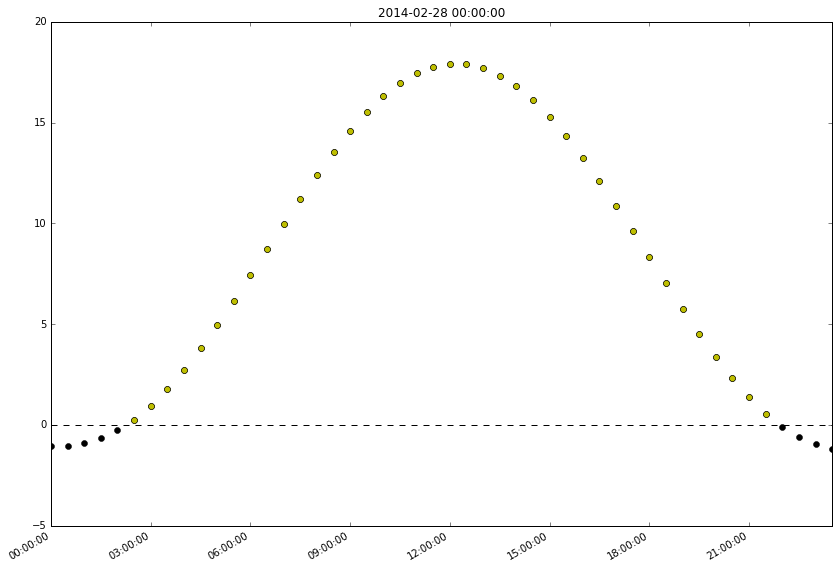

In [6]:
figure(figsize=(14,10))
# All points in black.
plot_date(time,alt*180./pi,'ko')

# Daytime points in yellow.
day = alt>0.
plot_date(time[day],alt[day]*180./pi,'yo')
title(str(utcday))

# Improve formatting.
axhline(0,color='k',linestyle='--')
gcf().autofmt_xdate()

In [7]:
ind = find(day>0.)
daylength = float(len(ind))/float(len(time)) * 24.
print('Approximate length of day is:', daylength, 'hours')

Approximate length of day is: 19.5 hours
